In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats
import pickle

## 제안 2에 대한 Topic 분석 

In [2]:
df_national = pd.read_csv("./teamkim_datas.SNS_national_petition.csv")

In [3]:
list_text = df_national["청원명"].to_list() + df_national["청원의 취지"].to_list() + df_national["청원의 내용"].to_list()
list_text

['극희귀질환 크라이오피린 연관 주기 증후군에 대한 치료제 키너렛주 아나킨라와 일라리스주 카나키누맙의 건강보험 급여항목 지정을 공개청원합니다.에 관한 청원',
 '희귀질환치료제 일라리스의 보험급여 적용에 관한 청원',
 '진성적혈구증가증 치료제 베스레미에 대한 건강 보험 급여화에 관한 청원',
 'XLH저인산혈증구루병 치료제 크리스비타의 신속 사용 승인에 관한 청원',
 '14만 파킨슨 환우를 죽음으로 내몰고 있는 대한민국 정부, 건강보험심사평가원의 무리한 약가 인하정책에 관한 청원',
 '수도권 전공의·전임의에 대한 업무개시명령 및 4대정책 전면 철회와 재난 및 안전관리 기본법 일부개정법률안 철회에 관한 청원',
 'EGFR 엑손 20 삽입 변이 비소세포폐암의 유일한 표적항암제의 건강보험 급여에 관한 청원',
 '먹을 약이 없는 한국의 파킨슨 환자를 위한 치료제 보급 요청에 관한 청원',
 '공급 중단된 파킨슨병 치료제 ‘마도파정’ 재공급에 관한 청원',
 '다발골수종 엑스포비오 약제의 조속한 보험 급여 요청에 관한 청원',
 '백신 부작용 피해보상 특별법 제정 촉구에 관한 청원',
 '모야모야병 환자 아이들의 학교 수업 개선에 관한 청원',
 '극희귀질환 크라이오피린 연관 주기(발열) 증후군 판정을 받고 치료중인 환자의 배우자입니다.\\n국내에 치료제가 두 가지 뿐인데 모두 비급여 항목으로 전액 본인부담입니다.\\n치료 과정도 막막한 상황인데 비용 부담이나마 덜 수 있도록 도와주세요.',
 '아이의 삶을 개선하고 일상적인 삶을 위해 급여항목으로 채택 되길 바라는 마음.',
 "만성골수증식성 질환 환자들의 생명을 지킬 유일한 치료제 '베스레미'의 보험 급여화를 청원합니다.\\n'진성적혈구증가증'이라는 만성골수증식성 질환은 희귀하지만 치명적인 혈액암의 일종입니다.\\n현재 사용 가능한 유일한 치료제는 '베스레미'입니다. \\n하지만 한달에 약 400만원이라는 비용 부담으로 인해 대부분의 환자들이 치료를 받지 못하고 있습니다.\\n이는 환자들에게 두 번의 고통을

In [4]:
# 불용어 리스트 생성 (예시)
stopwords = ['가', '고', '을', '를', '이', '는']
from konlpy.tag import Okt

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun","Alpha","Verb","Number"], stopword=stopwords):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   
            stem=True    
            )
            if len(word) > 1 and tag in pos and word not in stopword

    ]

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)
features = vectorizer.fit_transform(list_text)
features.toarray()

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.03590573, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0497309 ]])

In [6]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=3, random_state=55) #인스턴스화 #n_components 토픽의 갯수
lda_model.fit(features) #교육

LatentDirichletAllocation(n_components=3, random_state=55)

In [7]:
dictionary_list = vectorizer.get_feature_names_out()

In [8]:
lda_model.components_

array([[0.38016585, 0.38460972, 0.37949588, ..., 0.63370856, 0.38609552,
        0.33538007],
       [0.33355035, 0.33357277, 0.33355596, ..., 0.33380611, 0.33358844,
        0.33358535],
       [0.33354607, 0.33357119, 0.33355868, ..., 0.33380505, 0.33358742,
        0.38076549]])

In [9]:
topics_output = lda_model.transform(features)
df_topics_score = pd.DataFrame(data=topics_output)

In [10]:
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1) #  "topics_output" 배열에서 각 행마다 최대값의 인덱스를 찾아 "dominant_topic_number" 열에 할당

In [11]:
df_topics_score['sentences'] = list_text

In [12]:
df_topics_score

,0,1,2,dominant_topic_number,sentences
0,0.876781,0.061687,0.061532,0,극희귀질환 크라이오피린 연관 주기 증후군에 대한 치료제 키너렛주 아나킨라와 일라리스...
1,0.815919,0.092113,0.091969,0,희귀질환치료제 일라리스의 보험급여 적용에 관한 청원
2,0.837909,0.081217,0.080874,0,진성적혈구증가증 치료제 베스레미에 대한 건강 보험 급여화에 관한 청원
3,0.839077,0.080511,0.080412,0,XLH저인산혈증구루병 치료제 크리스비타의 신속 사용 승인에 관한 청원
4,0.848599,0.075662,0.075739,0,"14만 파킨슨 환우를 죽음으로 내몰고 있는 대한민국 정부, 건강보험심사평가원의 무리..."
5,0.077866,0.854292,0.067842,1,수도권 전공의·전임의에 대한 업무개시명령 및 4대정책 전면 철회와 재난 및 안전관리...
6,0.849198,0.075430,0.075372,0,EGFR 엑손 20 삽입 변이 비소세포폐암의 유일한 표적항암제의 건강보험 급여에 관...
7,0.817100,0.091558,0.091342,0,먹을 약이 없는 한국의 파킨슨 환자를 위한 치료제 보급 요청에 관한 청원
8,0.815568,0.092300,0.092133,0,공급 중단된 파킨슨병 치료제 ‘마도파정’ 재공급에 관한 청원
9,0.833638,0.083254,0.083109,0,다발골수종 엑스포비오 약제의 조속한 보험 급여 요청에 관한 청원


In [13]:
## 상위 단어 추출
topics_list = list()
for topic in lda_model.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T #T는 행과 열을 바꿈
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)


topics_list_add = [topics_list, ['Topic0', 'Topic1', 'Topic2']]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords

하다 치료 환자 되다 청원 급여 공급 보험 파킨슨병 파킨슨
촉구 보상 특별법 제정 백신 모야 피해 부작용 철회 국회
하다 국가 백신 학교 배려 가치 지원 젊은이 일꾼 우선


,0,1,2
0,하다 치료 환자 되다 청원 급여 공급 보험 파킨슨병 파킨슨,촉구 보상 특별법 제정 백신 모야 피해 부작용 철회 국회,하다 국가 백신 학교 배려 가치 지원 젊은이 일꾼 우선
1,Topic0,Topic1,Topic2


In [14]:
# 각 토픽별로 컬럼명 변경
df_topics_keywords.rename(columns={0: '파킨슨', 1 : '백신', 2 : '지원 및 배려'})

,파킨슨,백신,지원 및 배려
0,하다 치료 환자 되다 청원 급여 공급 보험 파킨슨병 파킨슨,촉구 보상 특별법 제정 백신 모야 피해 부작용 철회 국회,하다 국가 백신 학교 배려 가치 지원 젊은이 일꾼 우선
1,Topic0,Topic1,Topic2


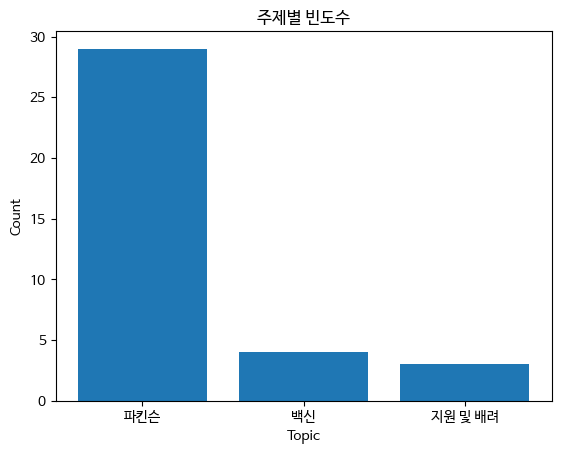

In [15]:
parkinson_count = len(df_topics_score.query("dominant_topic_number == 0"))
vaccine_count = len(df_topics_score.query("dominant_topic_number == 1"))
support_count = len(df_topics_score.query("dominant_topic_number == 2"))

x = ["파킨슨","백신","지원 및 배려"]
y = [parkinson_count,vaccine_count,support_count]

plt.bar(x, y)
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('주제별 빈도수')
plt.show()

## 분석결과
- 주제별 빈도수로 파킨슨병에 관한 내용이 많았고 그 다음 백신과 관련된 글, 지원 및 배려를 요구하는 글이 많았다.